<a href="https://colab.research.google.com/github/hakidaova/MLF/blob/main/MLF_cv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(2,))) # define input layer with 2 features
model.add(Dense(2, activation='sigmoid')) # hidden layer (2 neurons), too many means the model starts to memorize inputs, too little means the model doesnt learn enough
model.add(Dense(1, activation='sigmoid')) # output layer (1 neuron)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) # learning rate - "step accuracy"
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, epochs=3000, batch_size=1500, verbose=0) # batch updates the weight after n inputs

In [ ]:
loss, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))
print(loss)

Accuracy: 100.00
0.01094106025993824


In [ ]:
for id_x, data_sample in enumerate(X):
  data_sample = np.array(data_sample).reshape(1, 2)
  prediction = model.predict([data_sample])
  print(f"Data sample is {data_sample}, prediction from model {prediction}, ground_truth {y[id_x]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Data sample is [[0 0]], prediction from model [[0.00869718]], ground_truth 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Data sample is [[0 1]], prediction from model [[0.9902384]], ground_truth 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Data sample is [[1 0]], prediction from model [[0.990182]], ground_truth 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Data sample is [[1 1]], prediction from model [[0.01523567]], ground_truth 0


Text(0, 0.5, 'loss')

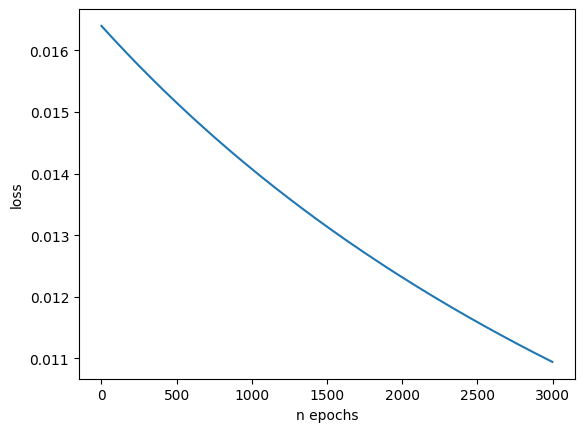

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

In [ ]:
# Exercise 2 - Congressional Voting Data
# In the attached dataset, results from congressional voting can be found. Your task is to train a model that can recognize that the politician is republican or democrat based on voting results. We would follow the general machine learning steps that were described in the lecture.


import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

path_to_dataset = 'drive/MyDrive/MLF/voting_complete.csv' # change the PATH
pd_dataset = pd.read_csv(path_to_dataset)

pd_dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [ ]:
def train_test_split(pd_data: pd.DataFrame, test_ratio: float = 0.2) -> tuple:
    pd_dataset = pd_data.copy()
    pd_dataset = pd_dataset[pd_dataset.columns[1:]]
    index = np.arange(len(pd_dataset))
    index = np.random.permutation(index)
    train_ammount = int(len(index)*test_ratio)
    train_ids = index[train_ammount:]
    test_ids = index[:train_ammount]

    train_dataset = pd_dataset[pd_dataset.index.isin(train_ids)].reset_index()
    test_dataset = pd_dataset[pd_dataset.index.isin(test_ids)].reset_index()

    train_dataset = train_dataset[train_dataset.columns[1:]]
    test_dataset = test_dataset[test_dataset.columns[1:]]

    return train_dataset[train_dataset.columns[1:]], train_dataset[train_dataset.columns[0]], test_dataset[test_dataset.columns[1:]], test_dataset[test_dataset.columns[0]]

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(pd_dataset)

# 3. Data examination
# The task would be to examine the dataset. Check:

# Is it a classification or regression task? classification - we have to categorize
# How many data samples do we have? 435
# How many features do we have? 16
# What data types do we have in our dataset? boolean
# Are there any missing values? yes
# How many labels do we have? 2

In [ ]:
x_train

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,y,n,y,n,?,n,y,y,y,y,n,y,n,?,y,y
344,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
345,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
346,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


# 4. Data preprocessing
When you preprocess your traing data, do not forget that you need to apply the same preprocessing also for your test set. For example: If you decide to delete some columns in your train set, you have to delete the same columns in your test set.

Possible preprocessing steps (try several and see the influence of your preprocessing on your results)

* Replace missing values with any data imputation
technique ( for example, the most occurring value in the column), then perform one-hot encoding or label encoding of your data
* Consider the missing value to be the third category 'unknown' and then perform one-hot encoding or label encoding

The target value also has to be encoded. This can be done by one-hot encoding or label encoding.

In [ ]:
x_train.replace('?', np.nan, inplace=True)
x_train.fillna(x_train.mode().iloc[0], inplace=True) # fills NaN values in the x_train with the mode (most frequent value) of the corresponding column
x_train

#one-hot encoding
x = pd.get_dummies(x_train) # categorical columns in x_train are converted into binary (0/1) columns using one-hot encoding
x

,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_y,physician-fee-freeze_n,physician-fee-freeze_y,el-salvador-aid_n,el-salvador-aid_y,...,education-spending_n,education-spending_y,superfund-right-to-sue_n,superfund-right-to-sue_y,crime_n,crime_y,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_n,export-administration-act-south-africa_y
0,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
1,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
2,True,False,False,True,False,True,True,False,False,True,...,True,False,False,True,False,True,True,False,True,False
3,False,True,False,True,False,True,True,False,False,True,...,True,False,False,True,False,True,False,True,False,True
4,True,False,False,True,False,True,True,False,False,True,...,True,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,True,False,True,False,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
344,True,False,False,True,False,True,True,False,True,False,...,True,False,False,True,True,False,False,True,False,True
345,False,True,True,False,False,True,True,False,False,True,...,False,True,True,False,False,True,False,True,False,True
346,True,False,True,False,False,True,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True


In [ ]:
y = y_train.replace({'republican':1, 'democrat':0})
y

<ipython-input-10-8919ae603e91>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y_train.replace({'republican':1, 'democrat':0})


,Class Name
0,1
1,1
2,0
3,0
4,0
...,...
343,1
344,0
345,0
346,1


In [ ]:
model = Sequential()
model.add(Dense(8, input_shape=(x.shape[1],), activation='relu')) #hiddent layers ... 16*n,
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

history = model.fit(x_train, y_train,
                    epochs = 40 ,
                    batch_size = 4,
                    verbose = 1,
                    validation_data = (x_val, y_val))

Epoch 1/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8574 - loss: 0.3423 - val_accuracy: 0.8714 - val_loss: 0.3345
Epoch 2/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9241 - loss: 0.2068 - val_accuracy: 0.9571 - val_loss: 0.2223
Epoch 3/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9392 - loss: 0.1557 - val_accuracy: 0.9429 - val_loss: 0.2245
Epoch 4/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9748 - loss: 0.1132 - val_accuracy: 0.9571 - val_loss: 0.2075
Epoch 5/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9725 - loss: 0.0785 - val_accuracy: 0.9286 - val_loss: 0.2407
Epoch 6/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9633 - loss: 0.0873 - val_accuracy: 0.8000 - val_loss: 0.7162
Epoch 7/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9520 - loss: 0.2319 - val_accuracy: 0.9286 - val_loss: 0.2497
Epoch 8/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9588 - loss: 0.0750 - val_accuracy: 0.9571 - val_loss

In [ ]:
x_test.replace('?', np.nan, inplace=True)
x_test.fillna(x_test.mode().iloc[0], inplace=True)
x_test

x1 = pd.get_dummies(x_val) # categorical columns in x_train are converted into binary (0/1) columns using one-hot encoding
x1

,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_y,physician-fee-freeze_n,physician-fee-freeze_y,el-salvador-aid_n,el-salvador-aid_y,...,education-spending_n,education-spending_y,superfund-right-to-sue_n,superfund-right-to-sue_y,crime_n,crime_y,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_n,export-administration-act-south-africa_y
188,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
117,True,False,True,False,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
263,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
119,True,False,True,False,False,True,True,False,True,False,...,True,False,True,False,False,True,True,False,False,True
132,True,False,False,True,False,True,True,False,False,True,...,False,True,False,True,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,False,True,True,False,True,False,False,True,False,True,...,True,False,False,True,False,True,True,False,True,False
30,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,True,False
72,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,True,False
115,True,False,True,False,True,False,False,True,True,False,...,True,False,False,True,False,True,True,False,False,True


In [ ]:
y1 = y_val.replace({'republican':1, 'democrat':0})
y1

,Class Name
188,1
117,1
263,1
119,0
132,0
...,...
228,1
30,1
72,1
115,1


In [ ]:
loss, accuracy = model.evaluate(x1, y1, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))
print('Loss: {:.2f}'.format(loss*100))

Accuracy: 95.71
Loss: 56.72


Text(0, 0.5, 'loss')

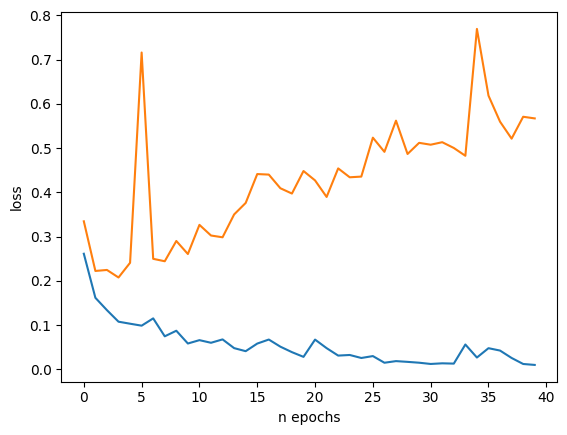

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')